# EDA for Solar Energy on togo-dapaong_qc

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore


In [4]:
df = pd.read_csv(r'C:\Users\ASUS VIVO\Desktop\New folder\data\togo-dapaong_qc.csv',encoding='latin')

In [5]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


# summary about our data

In [6]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

check missing values

In [8]:
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

luckily the dataset has no null values , so now check negative values

In [9]:
df[(df['GHI'] <0 )&(df['DNI']< 0)& (df['DHI']< 0)][['GHI','DNI','DHI']]

,GHI,DNI,DHI


we can infer that our data set have negative values,we have to make all postive

In [10]:

def ab(x):
    x = abs(x)
    return x 

columns_to_modify = ['GHI', 'DNI', 'DHI']
df[columns_to_modify] = df[columns_to_modify].apply(ab)

In [11]:
df[(df['GHI'] <0 )&(df['DNI']< 0)& (df['DHI']< 0)][['GHI','DNI','DHI']]

,GHI,DNI,DHI


so now we can say all our data is positive

 # Time Series Analysis: 
Plot bar charts or line charts  of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations.

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

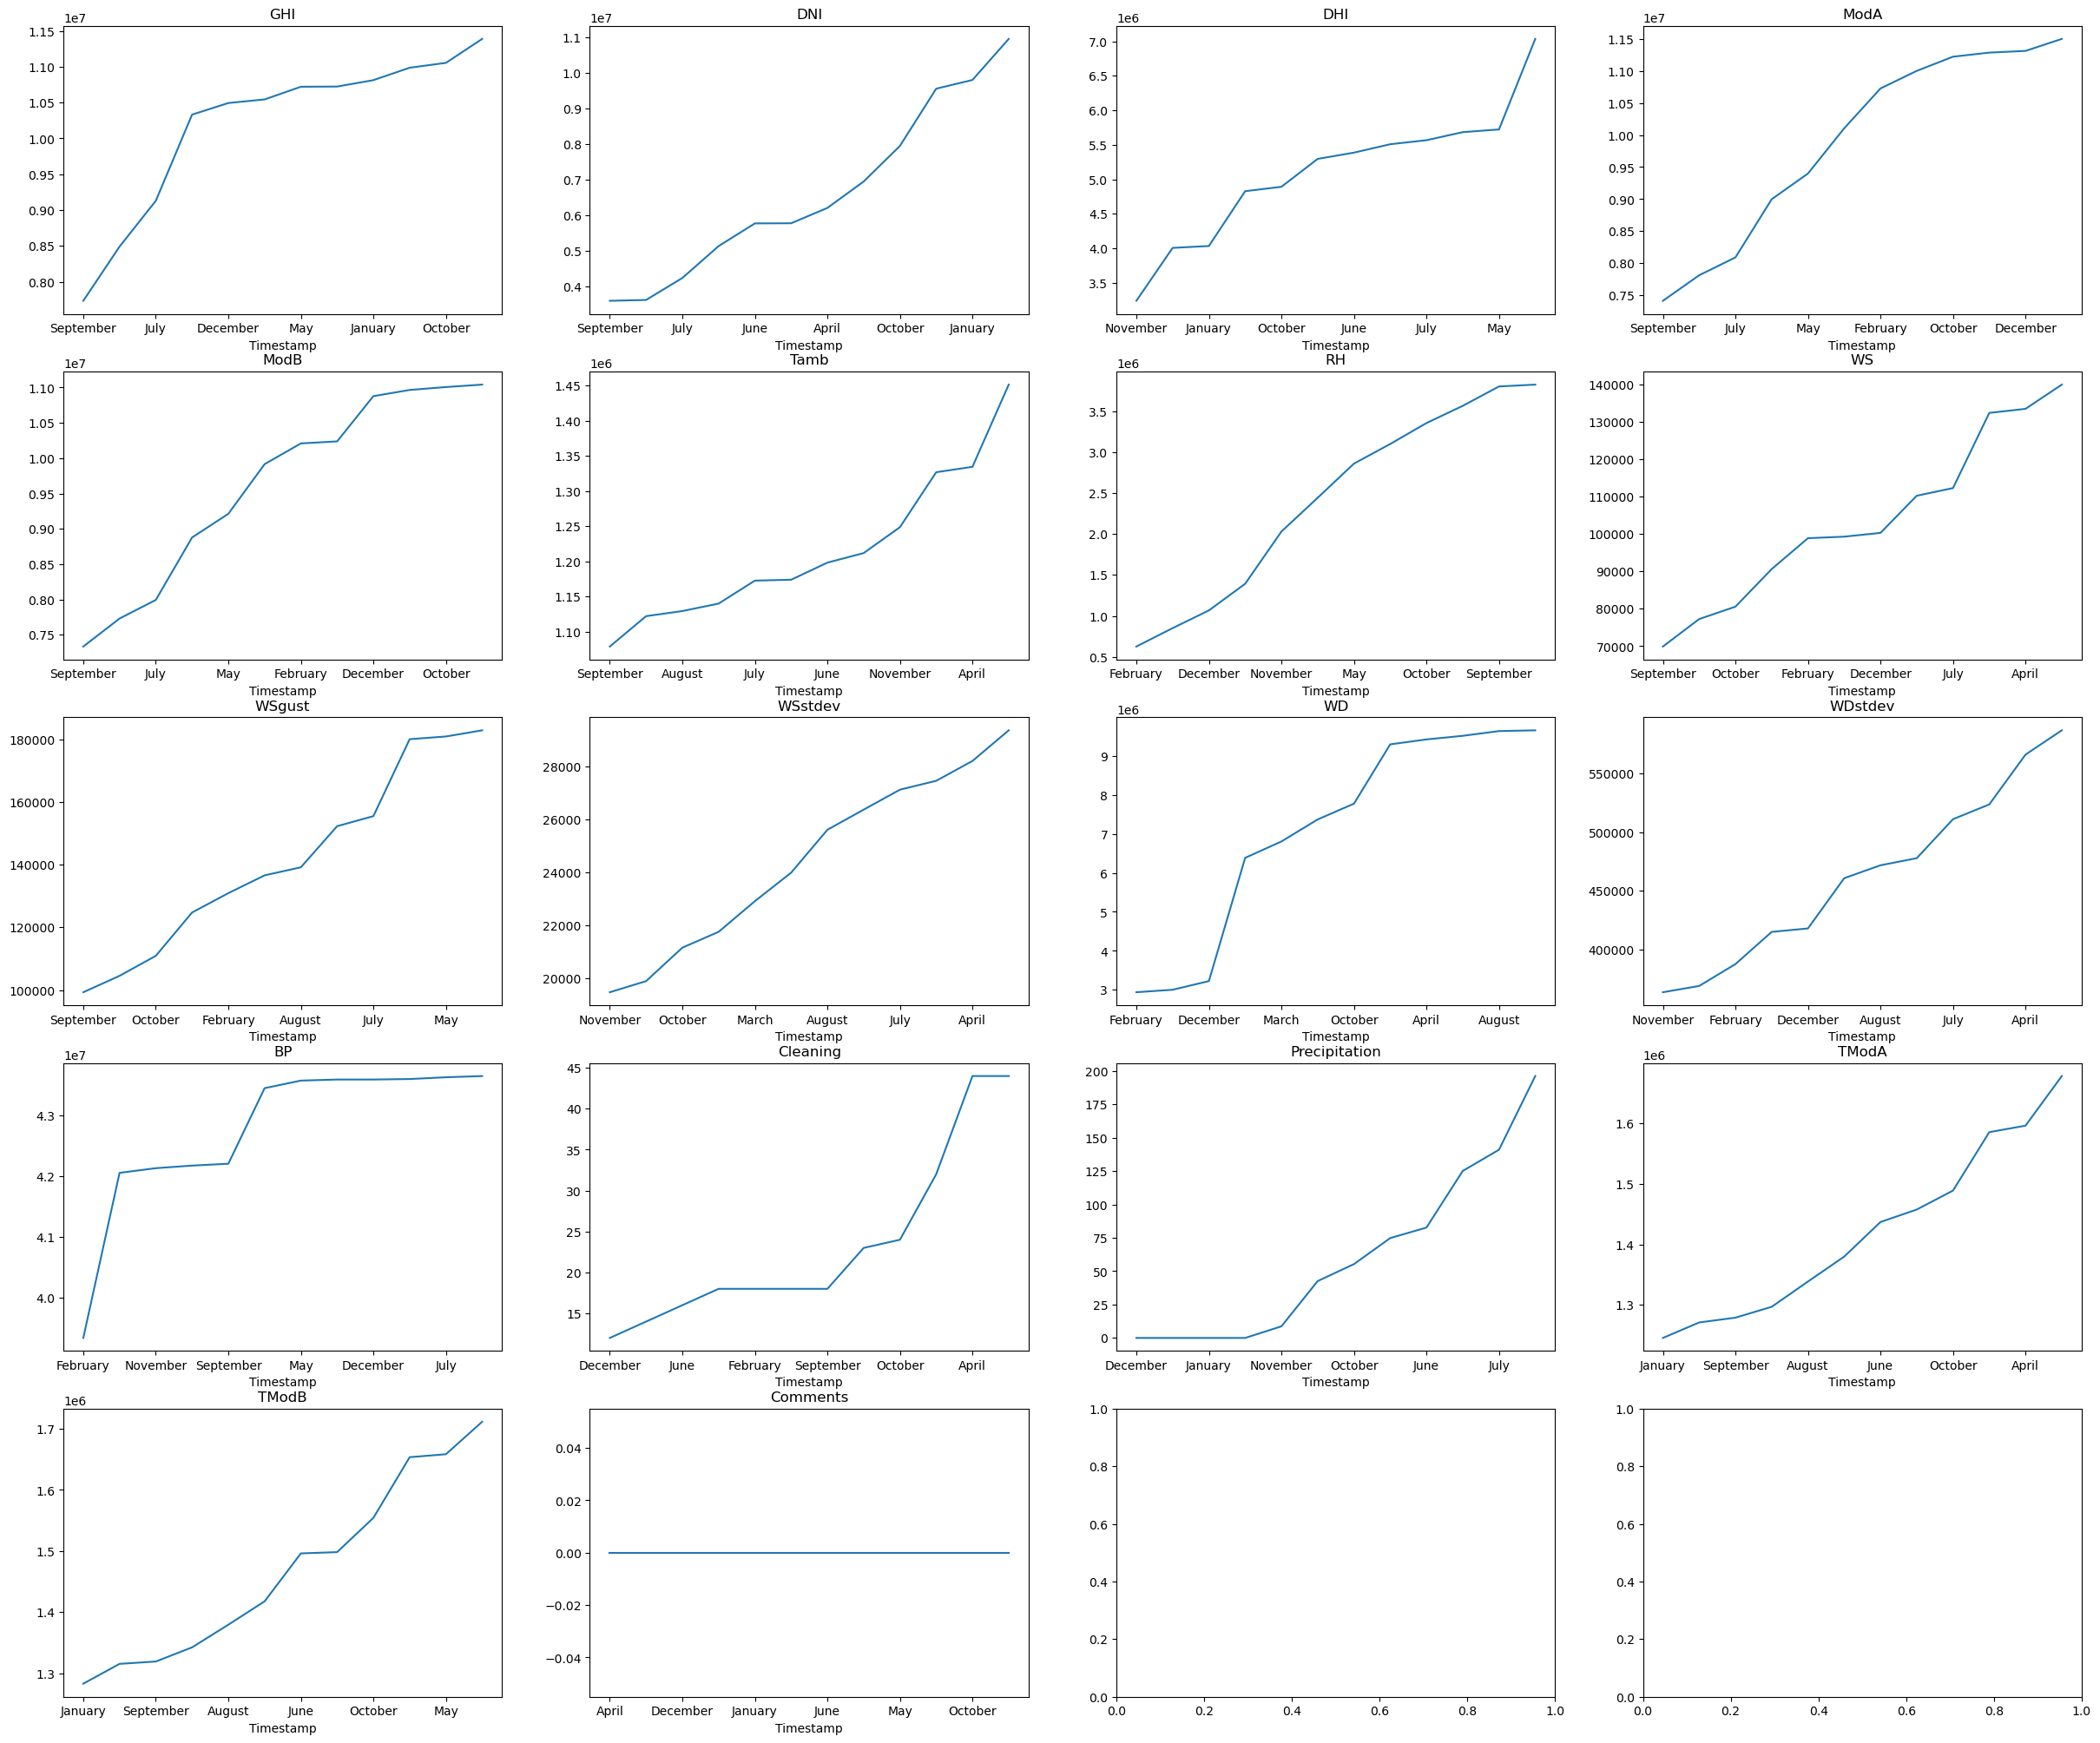

In [13]:
fig, axes=plt.subplots(5, 4, figsize=(30,25))
axes=axes.flatten()
list=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments']
for i,column in enumerate(list):
    df.groupby(df['Timestamp'].dt.strftime('%B'))[column].sum().sort_values().plot(kind='line',ax=axes[i])
    axes[i].set_title(column)
     

<Figure size 1000x1000 with 0 Axes>

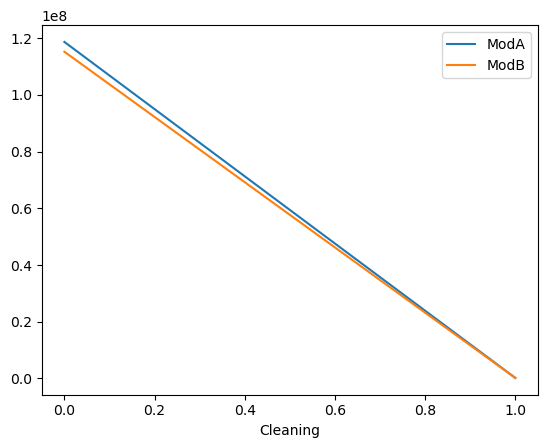

In [14]:
plt.figure(figsize=(10,10))
df.groupby('Cleaning')[['ModA','ModB']].sum().plot(kind='line')
plt.show()


cleaning has a significant effect on measure the irradiance of sensors

# Correlation Analysis:
Use correlation matrices or pair plots to visualize the correlations between solar radiation components (GHI, DNI, DHI) and temperature measures (TModA, TModB).

<Axes: >

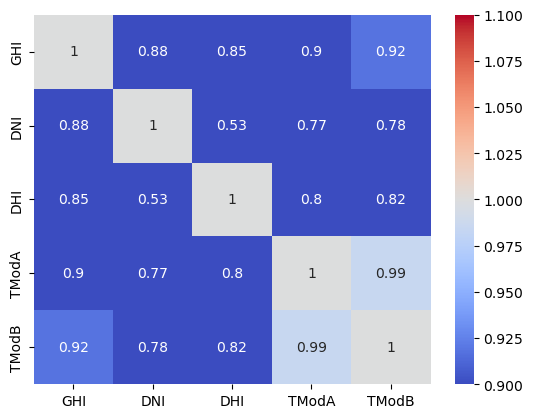

In [15]:
list=[ 'GHI', 'DNI', 'DHI','TModA', 'TModB']
sns.heatmap(df[list].corr(),vmax=1,vmin=1, cmap='coolwarm',annot=True)

Investigate the relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices.


Text(0.5, 0.98, 'Scatter matrics of Wind Conditions and solar Irradiance')

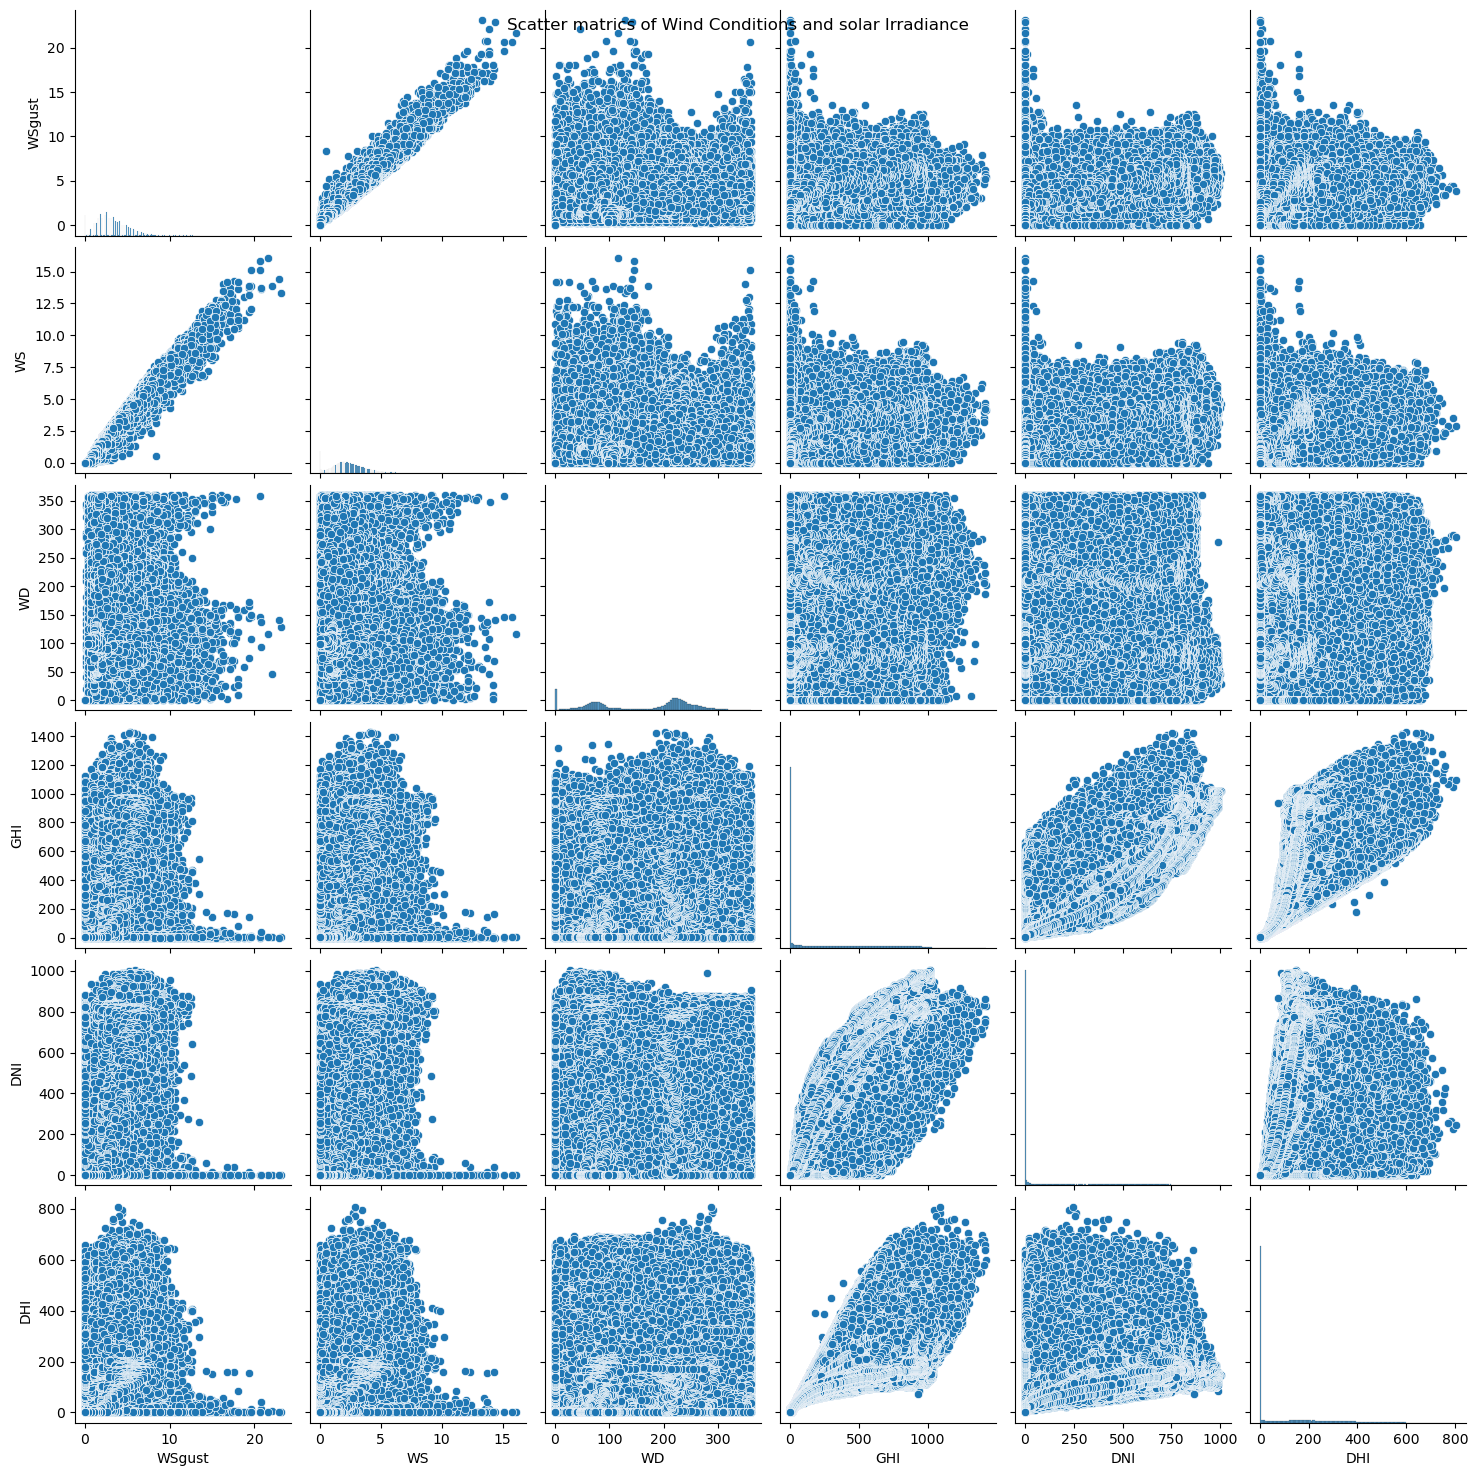

In [16]:
df_new=df[['WSgust','WS','WD','GHI','DNI','DHI']]
sns.pairplot(df_new)
plt.suptitle('Scatter matrics of Wind Conditions and solar Irradiance')

# Wind Analysis:
Use radial bar plots or wind roses Identify trends and significant wind events by showing the distribution of wind speed and direction, along with how variable the wind direction tends to be.


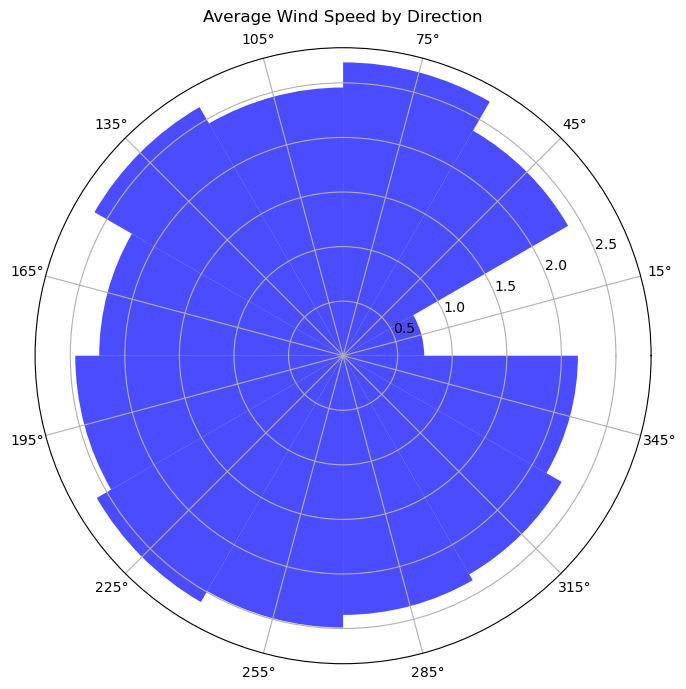

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


num_bins = 12
# Create bins for wind direction (0 to 360 degrees)
bins = np.linspace(0, 360, num_bins + 1)

# Calculate average wind speed for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2
avg_speeds = []

for i in range(num_bins):
    avg_speed = df[(df['WD'] >= bins[i]) & (df['WD'] < bins[i + 1])]['WS'].mean()
    avg_speeds.append(avg_speed)

# Create a radial bar plot
angles = np.radians(bin_centers)  
radii = avg_speeds

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, radii, width=np.radians(360 / num_bins), color='blue', alpha=0.7)

# Add titles and labels
ax.set_title('Average Wind Speed by Direction', va='bottom')
ax.set_xticks(angles) 
ax.set_xticklabels([f"{int(center)}°" for center in bin_centers])  

# Show the plot
plt.show()

# Temperature analysis
Examine how relative humidity (RH) might influence temperature readings and solar radiation.


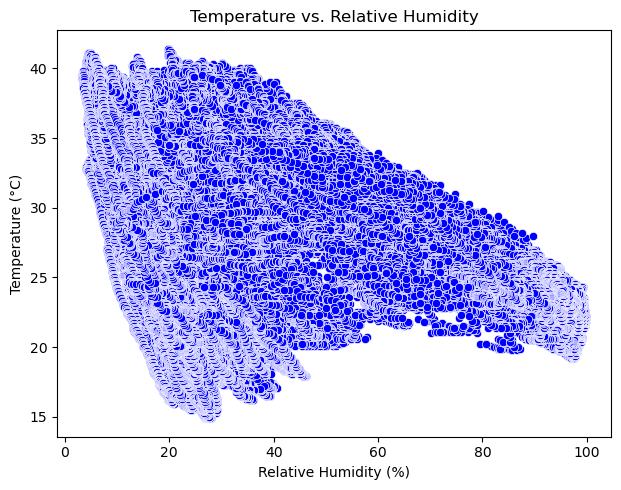

Correlation between RH and Temperature: -0.40


In [18]:

plt.figure(figsize=(12, 5))

# Temperature vs. RH
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='RH', y='Tamb', color='blue')
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')



plt.tight_layout()
plt.show()

# Correlation Analysis
correlation_rh_temp = df['RH'].corr(df['Tamb'])

print(f'Correlation between RH and Temperature: {correlation_rh_temp:.2f}')

# Histograms
 Create histograms for variables like GHI, DNI, DHI, WS, and temperatures to visualize the frequency distribution of these variables

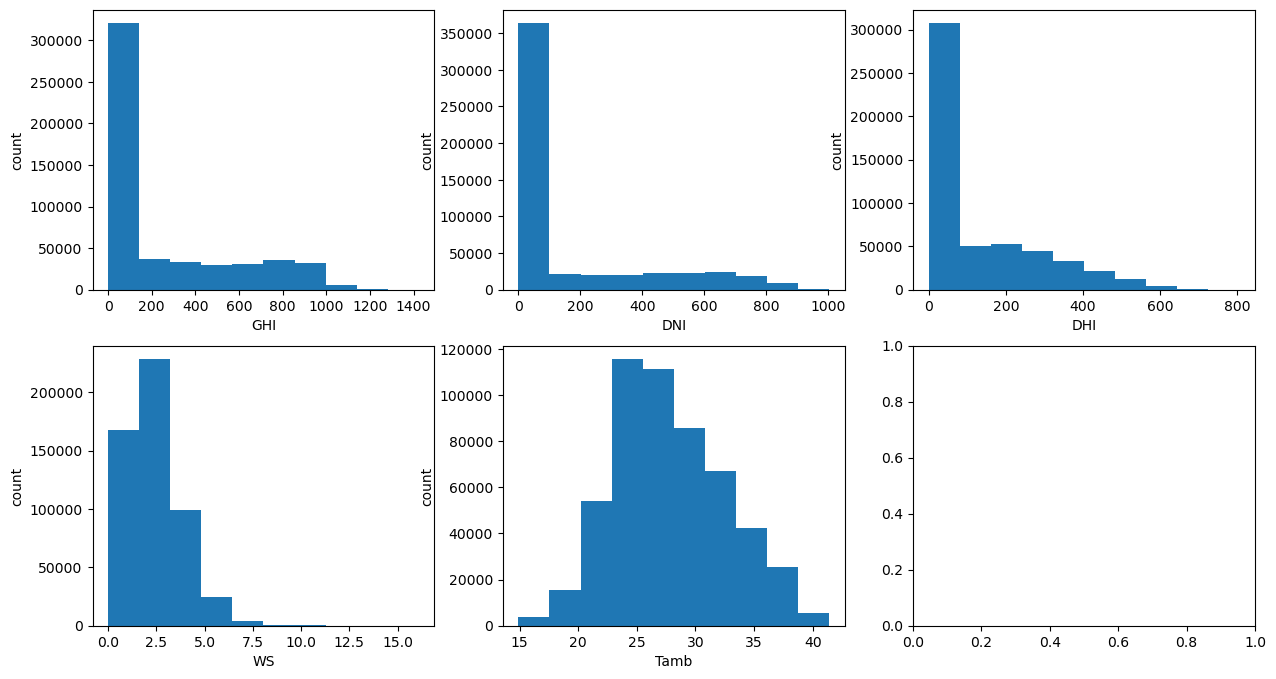

In [19]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
axes=axes.flatten()
list=['GHI','DNI','DHI','WS','Tamb']
for i,feature in enumerate(list):
    axes[i].hist(df[feature])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('count')
plt.show()


# Z score analysis
 Calculate Z-scores to flag data points that are significantly different from the mean


Identified Outliers:
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670    2021-10-25 11:11:00   860.0  397.1  515.5   892.0   881.0  30.8  69.3   
671    2021-10-25 11:12:00   932.0  495.2  509.2   975.0   963.0  31.0  69.8   
672    2021-10-25 11:13:00   962.0  532.7  503.5  1000.0   987.0  31.2  69.6   
673    2021-10-25 11:14:00   897.0  478.5  486.3   940.0   928.0  31.2  68.2   
674    2021-10-25 11:15:00  1094.0  706.7  490.8  1140.0  1126.0  31.2  67.9   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
524965 2022-10-24 13:26:00   844.0  773.5  164.5   882.7   849.0  34.9  29.9   
524966 2022-10-24 13:27:00   841.0  770.8  164.6   878.6   846.0  35.0  28.8   
524967 2022-10-24 13:28:00   837.0  768.4  164.3   874.6   842.0  35.0  29.1   
524968 2022-10-24 13:29:00   832.0  763.5  164.5   869.6   837.0  35.1  27.8   
524969 2022-10-24 13:30:00   829.0  760.3  164.0   865.5   833.0  35.0  28.0   

         WS  WSgus

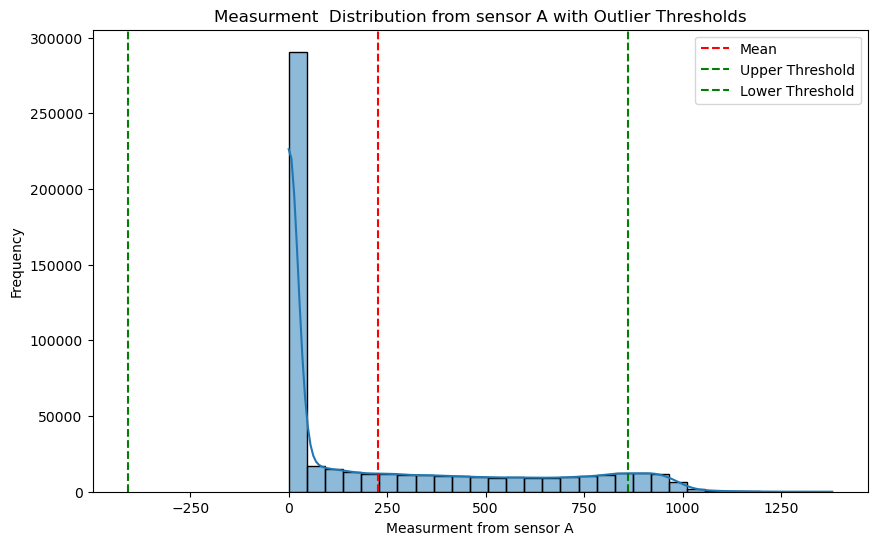

In [20]:

df['Z_Score'] = zscore(df['ModA'])


threshold = 2 

# Flag outliers
df['Outlier'] = df['Z_Score'].abs() > threshold

# Display the results
outliers = df[df['Outlier']]
print("Identified Outliers:")
print(outliers)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['ModA'], bins=30, kde=True)
plt.axvline(x=df['ModA'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=df['ModA'].mean() + threshold * df['ModA'].std(), color='g', linestyle='--', label='Upper Threshold')
plt.axvline(x=df['ModA'].mean() - threshold * df['ModA'].std(), color='g', linestyle='--', label='Lower Threshold')
plt.title('Measurment  Distribution from sensor A with Outlier Thresholds')
plt.xlabel('Measurment from sensor A')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Identified Outliers:
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670    2021-10-25 11:11:00   860.0  397.1  515.5   892.0   881.0  30.8  69.3   
671    2021-10-25 11:12:00   932.0  495.2  509.2   975.0   963.0  31.0  69.8   
672    2021-10-25 11:13:00   962.0  532.7  503.5  1000.0   987.0  31.2  69.6   
673    2021-10-25 11:14:00   897.0  478.5  486.3   940.0   928.0  31.2  68.2   
674    2021-10-25 11:15:00  1094.0  706.7  490.8  1140.0  1126.0  31.2  67.9   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
524964 2022-10-24 13:25:00   847.0  775.0  165.1   885.7   853.0  34.9  29.1   
524965 2022-10-24 13:26:00   844.0  773.5  164.5   882.7   849.0  34.9  29.9   
524966 2022-10-24 13:27:00   841.0  770.8  164.6   878.6   846.0  35.0  28.8   
524967 2022-10-24 13:28:00   837.0  768.4  164.3   874.6   842.0  35.0  29.1   
524968 2022-10-24 13:29:00   832.0  763.5  164.5   869.6   837.0  35.1  27.8   

         WS  WSgus

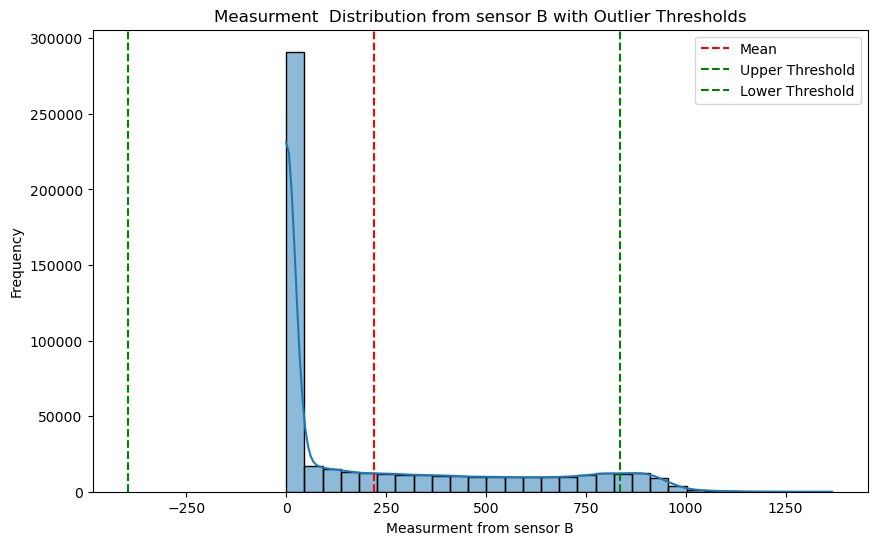

In [21]:

df['Z_Score'] = zscore(df['ModB'])


threshold = 2 

# Flag outliers
df['Outlier'] = df['Z_Score'].abs() > threshold

# Display the results
outliers = df[df['Outlier']]
print("Identified Outliers:")
print(outliers)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['ModB'], bins=30, kde=True)
plt.axvline(x=df['ModB'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=df['ModB'].mean() + threshold * df['ModB'].std(), color='g', linestyle='--', label='Upper Threshold')
plt.axvline(x=df['ModB'].mean() - threshold * df['ModB'].std(), color='g', linestyle='--', label='Lower Threshold')
plt.title('Measurment  Distribution from sensor B with Outlier Thresholds')
plt.xlabel('Measurment from sensor B')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Identified Outliers:
                 Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH  \
1929   2021-10-26 08:10:00  475.1  538.7  194.2  494.4  486.3  27.6  80.6   
1988   2021-10-26 09:09:00  685.8  648.0  239.7  721.0  709.8  29.2  75.9   
4819   2021-10-28 08:20:00  509.4  611.4  172.6  534.8  523.1  27.9  78.2   
4820   2021-10-28 08:21:00  513.6  613.6  173.4  539.1  527.4  27.8  77.3   
4827   2021-10-28 08:28:00  539.5  628.6  176.7  566.3  554.2  27.9  77.0   
...                    ...    ...    ...    ...    ...    ...   ...   ...   
524993 2022-10-24 13:54:00  777.2  746.6  163.0  813.1  782.2  35.0  29.4   
524994 2022-10-24 13:55:00  779.8  750.5  163.4  814.2  783.7  34.9  29.4   
525005 2022-10-24 14:06:00  750.4  773.1  138.8  784.7  754.5  35.0  28.9   
525012 2022-10-24 14:13:00  731.6  737.5  157.8  764.4  734.9  35.1  28.4   
525017 2022-10-24 14:18:00  717.6  735.5  154.9  749.9  720.7  35.1  29.7   

         WS  WSgust  ...     WD  WDstdev   BP  Cleanin

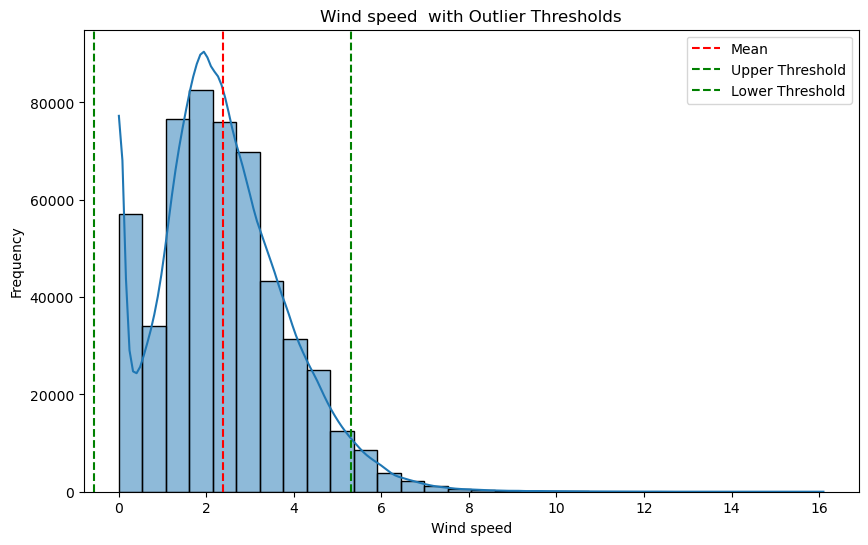

In [22]:


df['Z_Score'] = zscore(df['WS'])


threshold = 2 

# Flag outliers
df['Outlier'] = df['Z_Score'].abs() > threshold


outliers = df[df['Outlier']]
print("Identified Outliers:")
print(outliers)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['WS'], bins=30, kde=True)
plt.axvline(x=df['WS'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=df['WS'].mean() + threshold * df['WS'].std(), color='g', linestyle='--', label='Upper Threshold')
plt.axvline(x=df['WS'].mean() - threshold * df['WS'].std(), color='g', linestyle='--', label='Lower Threshold')
plt.title('Wind speed  with Outlier Thresholds')
plt.xlabel('Wind speed')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Identified Outliers:
                 Timestamp    GHI    DNI    DHI    ModA   ModB  Tamb    RH  \
1937   2021-10-26 08:18:00  507.4  564.2  198.9   529.1  520.6  27.8  80.0   
2122   2021-10-26 11:23:00  977.0  746.6  324.7  1011.0  997.0  31.9  62.7   
4825   2021-10-28 08:26:00  532.6  625.3  176.1   559.3  547.3  27.8  76.8   
4826   2021-10-28 08:27:00  536.8  627.8  176.8   563.6  551.6  27.8  77.2   
4836   2021-10-28 08:37:00  573.9  654.1  179.8   603.4  590.7  28.0  76.1   
...                    ...    ...    ...    ...     ...    ...   ...   ...   
524967 2022-10-24 13:28:00  837.0  768.4  164.3   874.6  842.0  35.0  29.1   
524968 2022-10-24 13:29:00  832.0  763.5  164.5   869.6  837.0  35.1  27.8   
524993 2022-10-24 13:54:00  777.2  746.6  163.0   813.1  782.2  35.0  29.4   
524994 2022-10-24 13:55:00  779.8  750.5  163.4   814.2  783.7  34.9  29.4   
525005 2022-10-24 14:06:00  750.4  773.1  138.8   784.7  754.5  35.0  28.9   

         WS  WSgust  ...     WD  WDstdev  

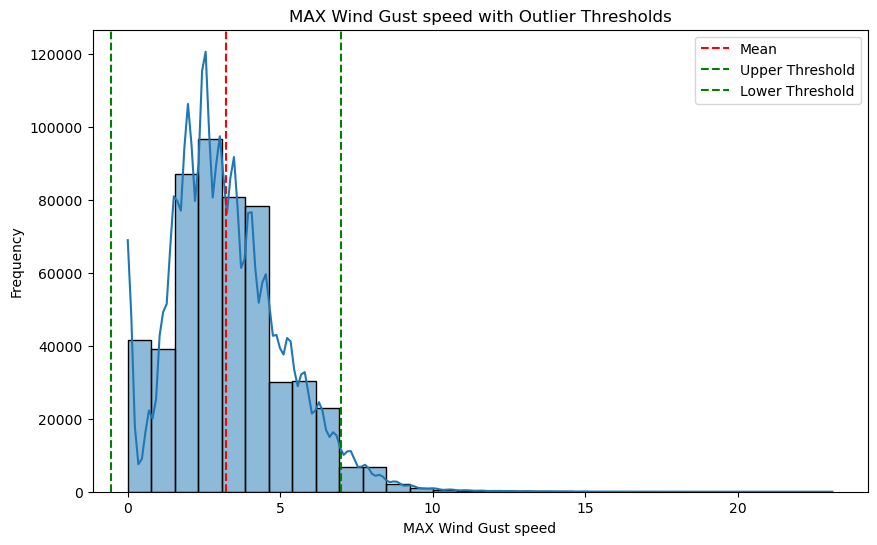

In [23]:
	
 
 
df['Z_Score'] = zscore(df['WSgust'])


threshold = 2 

# Flag outliers
df['Outlier'] = df['Z_Score'].abs() > threshold


outliers = df[df['Outlier']]
print("Identified Outliers:")
print(outliers)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['WSgust'], bins=30, kde=True)
plt.axvline(x=df['WSgust'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=df['WSgust'].mean() + threshold * df['WSgust'].std(), color='g', linestyle='--', label='Upper Threshold')
plt.axvline(x=df['WSgust'].mean() - threshold * df['WSgust'].std(), color='g', linestyle='--', label='Lower Threshold')
plt.title('MAX Wind Gust speed with Outlier Thresholds')
plt.xlabel('MAX Wind Gust speed')
plt.ylabel('Frequency')
plt.legend()
plt.show()
 
 

# bubble chart 
to explore complex relationships between variables, such as GHI vs. Tamb vs. WS, with bubble size representing an additional variable like RH or BP (Barometric Pressure)

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


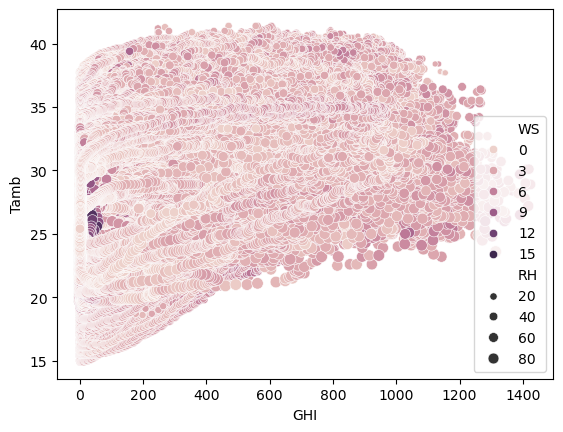

In [24]:
figsize=(10,5)
sns.scatterplot(
    data=df,
    x='GHI',
    y='Tamb',
    hue='WS',
    size='RH',
)
plt.show()


In [25]:
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Z_Score,Outlier
0,2021-10-25 00:01:00,1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,227.6,1.1,977,0,0.0,24.7,24.4,NaN,-1.131165,False
1,2021-10-25 00:02:00,1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,229.3,0.7,977,0,0.0,24.7,24.4,NaN,-0.865570,False
2,2021-10-25 00:03:00,1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,228.5,2.9,977,0,0.0,24.7,24.4,NaN,-0.971808,False
3,2021-10-25 00:04:00,1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,229.1,4.6,977,0,0.0,24.7,24.4,NaN,-0.865570,False
4,2021-10-25 00:05:00,1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,227.5,1.6,977,0,0.0,24.7,24.4,NaN,-0.865570,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56:00,0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,...,0.0,0.0,977,0,0.0,24.3,24.0,NaN,-1.715475,False
525596,2022-10-24 23:57:00,0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,...,0.0,0.0,977,0,0.0,24.3,24.0,NaN,-1.715475,False
525597,2022-10-24 23:58:00,1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,...,0.0,0.0,977,0,0.0,24.2,23.9,NaN,-1.715475,False
525598,2022-10-24 23:59:00,1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,...,0.0,0.0,977,0,0.0,24.1,23.8,NaN,-1.715475,False


In [26]:
df.drop('Comments',axis=1,inplace=True)

In [27]:
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Z_Score,Outlier
0,2021-10-25 00:01:00,1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,-1.131165,False
1,2021-10-25 00:02:00,1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,-0.865570,False
2,2021-10-25 00:03:00,1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,-0.971808,False
3,2021-10-25 00:04:00,1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,-0.865570,False
4,2021-10-25 00:05:00,1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,-0.865570,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56:00,0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,-1.715475,False
525596,2022-10-24 23:57:00,0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,-1.715475,False
525597,2022-10-24 23:58:00,1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,-1.715475,False
525598,2022-10-24 23:59:00,1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,-1.715475,False
